In [1]:
import pandas as pd       
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.shape

(200, 5)

In [4]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df['Spending Score (1-100)'].value_counts()

42    8
55    7
46    6
73    6
75    5
     ..
63    1
34    1
44    1
45    1
99    1
Name: Spending Score (1-100), Length: 84, dtype: int64

In [9]:
df.drop('CustomerID', axis = 1, inplace = True)


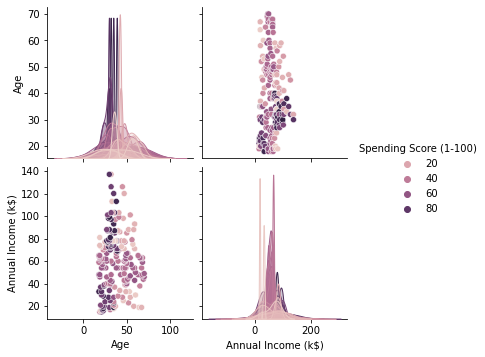

In [10]:
sns.pairplot(df, hue = 'Spending Score (1-100)')

In [11]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [12]:
def male_female(x):
    return 0 if x == 'Male' else 1
df['Gender'] = df['Gender'].map(lambda x : male_female(x))
#df.Gender.replace('Male',0,inplace = 0)

In [13]:
df.nunique()

Gender                     2
Age                       51
Annual Income (k$)        64
Spending Score (1-100)    84
dtype: int64

In [14]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


##EDA

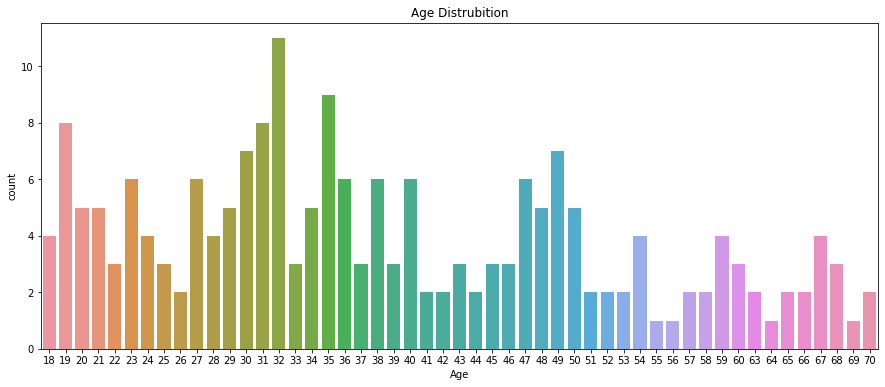

In [15]:
plt.figure(figsize = (15,6))
sns.countplot(df['Age'])
plt.title('Age Distrubition')
plt.xlabel('Age')
plt.show()

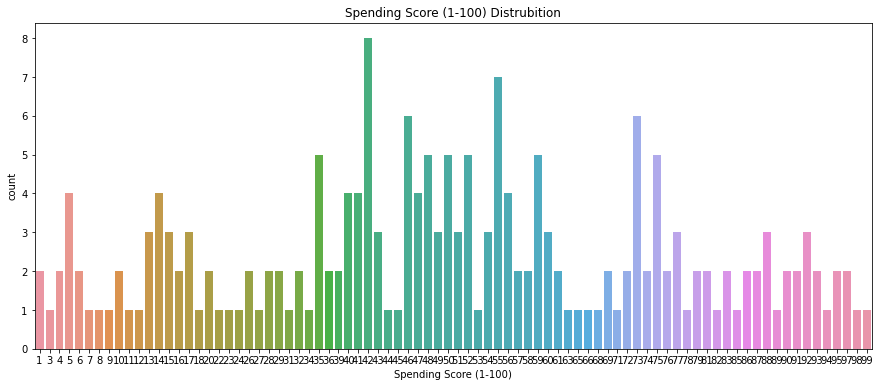

In [16]:
plt.figure(figsize = (15,6))
sns.countplot(df['Spending Score (1-100)'])
plt.title('Spending Score (1-100) Distrubition')
plt.xlabel('Spending Score (1-100)')
plt.show()

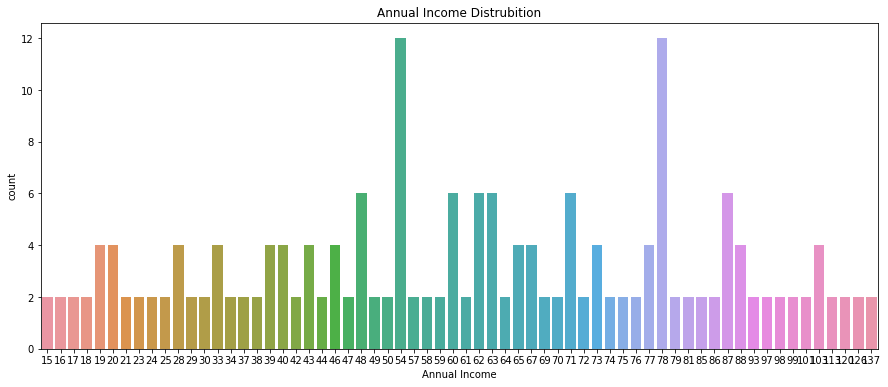

In [17]:
plt.figure(figsize = (15,6))
sns.countplot(df['Annual Income (k$)'])
plt.title('Annual Income Distrubition')
plt.xlabel('Annual Income')
plt.show()

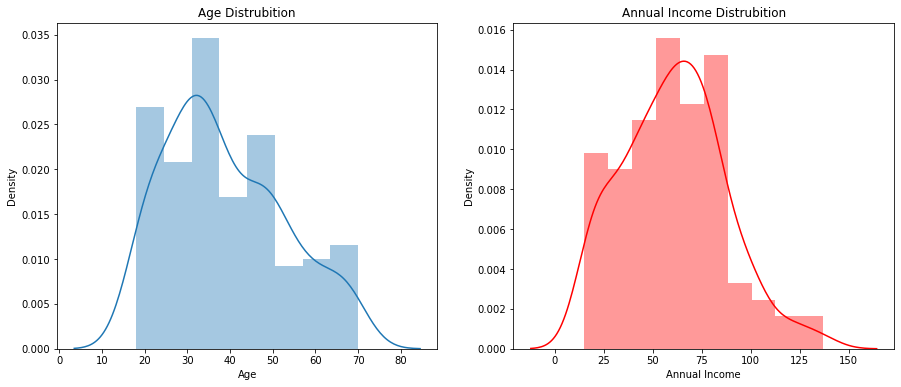

In [18]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.distplot(df['Age'])
plt.title('Age Distrubition')
plt.xlabel('Age')

plt.subplot(1,2,2)
sns.distplot(df['Annual Income (k$)'], color = 'red')
plt.title('Annual Income Distrubition')
plt.xlabel('Annual Income')
plt.show()

(-1.25, 1.25, -1.25, 1.25)

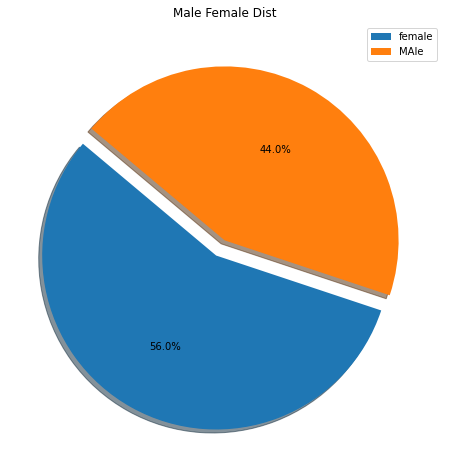

In [19]:
plt.figure(figsize = (8,8))
explode = [0.1,0]
plt.pie(df['Gender'].value_counts(), explode = explode, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.legend(labels = ['female', 'MAle'])
plt.title('Male Female Dist')
plt.axis('off')

In [20]:
df.corr()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,-0.060867,-0.056410,0.058109
Age,-0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.058109,-0.327227,0.009903,1.000000


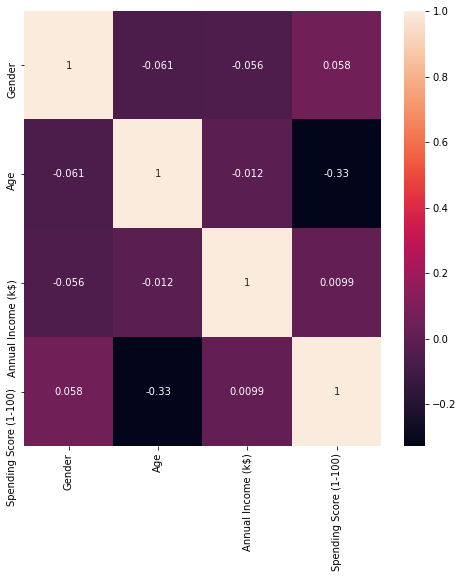

In [21]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

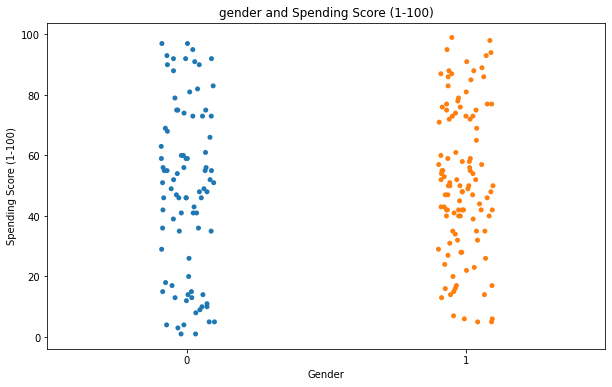

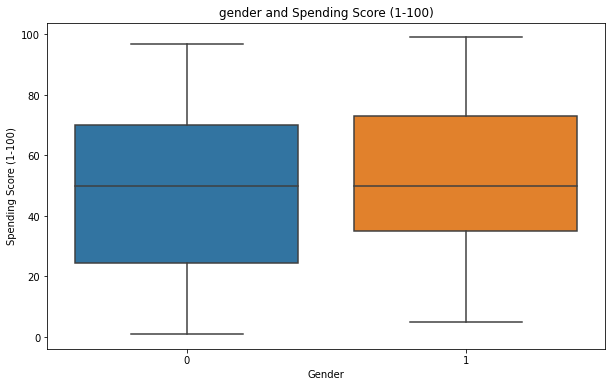

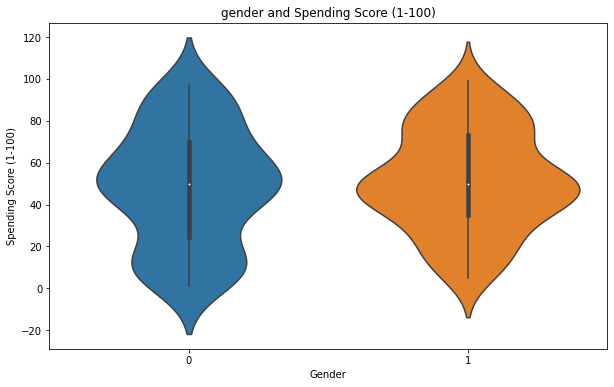

In [22]:
plt.figure(figsize = (10,6))
sns.stripplot(df['Gender'], df['Spending Score (1-100)'])
plt.title('gender and Spending Score (1-100)')
plt.show()

plt.figure(figsize = (10,6))
sns.boxplot(df['Gender'], df['Spending Score (1-100)'])
plt.title('gender and Spending Score (1-100)')
plt.show()

plt.figure(figsize = (10,6))
sns.violinplot(df['Gender'], df['Spending Score (1-100)'])
plt.title('gender and Spending Score (1-100)')
plt.show()

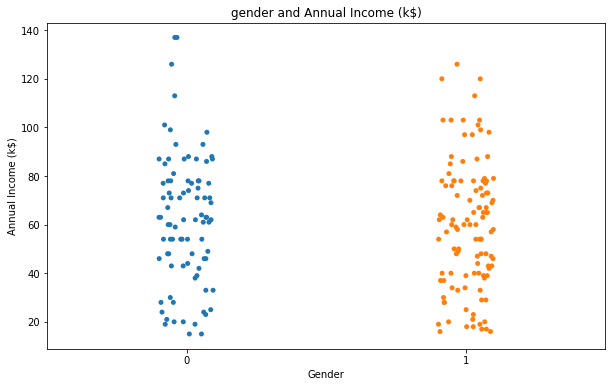

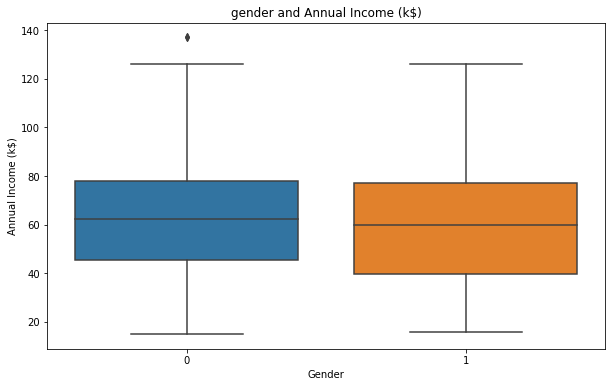

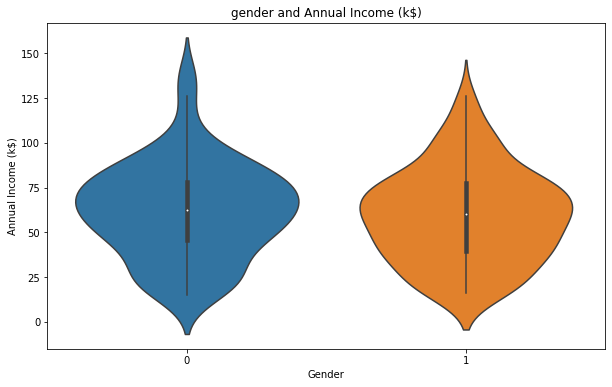

In [23]:
plt.figure(figsize = (10,6))
sns.stripplot(df['Gender'], df['Annual Income (k$)'])
plt.title('gender and Annual Income (k$)')
plt.show()

plt.figure(figsize = (10,6))
sns.boxplot(df['Gender'], df['Annual Income (k$)'])
plt.title('gender and Annual Income (k$)')
plt.show()

plt.figure(figsize = (10,6))
sns.violinplot(df['Gender'], df['Annual Income (k$)'])
plt.title('gender and Annual Income (k$)')
plt.show()

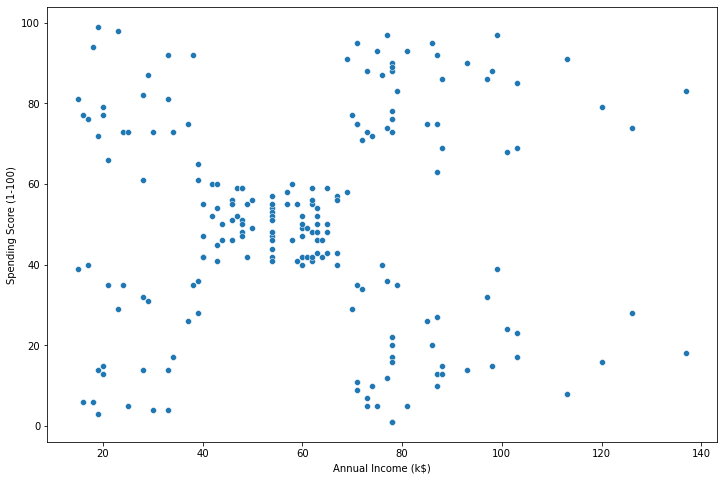

In [24]:
fig, ax = plt.subplots(figsize = (12,8))
sns.scatterplot(df['Annual Income (k$)'], df['Spending Score (1-100)'], ax = ax)
plt.show()

CLUSTER ANALYSIS

In [25]:
from pyclustertend import hopkins
X1 = pd.DataFrame(df.loc[:, ['Age', 'Spending Score (1-100)']].values, columns = ['Age', 'Spending_Score'])
X1

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [26]:
hopkins(X1,df.shape[0])

0.30295807983491696

Text(0.5, 1.0, 'Elbow method')

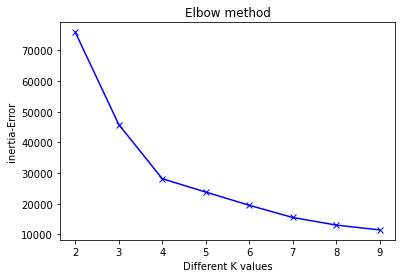

In [27]:
# optimal number of clusters
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
ssd = []
K = range(2,10)
for k in K :
    model = KMeans(n_clusters = k)
    model.fit(X1)
    ssd.append(model.inertia_)
plt.plot(K, ssd, "bx-")
plt.xlabel('Different K values')
plt.ylabel('inertia-Error')
plt.title('Elbow method')
# amac minimum cluster'la maximum verimi almak

In [28]:
model = KMeans(n_clusters = 4)
model.fit(X1)
model

KMeans(n_clusters=4)

In [29]:
model.inertia_

28165.583566629342

In [30]:
clusters = model.labels_
# y_means = kmeans.fit_predict(X1) ++++++ labelleri doner

In [31]:
X1['predicted_clusters']  = clusters
X1.head()

,Age,Spending_Score,predicted_clusters
0,19,39,3
1,21,81,1
2,20,6,0
3,23,77,1
4,31,40,3


<AxesSubplot:xlabel='Age', ylabel='Spending_Score'>

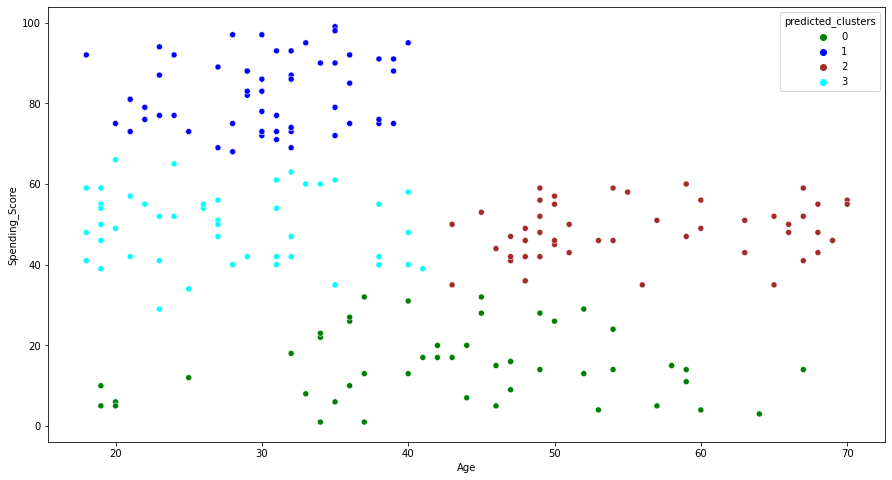

In [32]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = X1['Age'], y = X1['Spending_Score'],hue = 'predicted_clusters', data = X1, palette = ['green', 'blue', 'brown', 'cyan'],legend = 'full')

# ANOTHER VARIABLES

In [33]:
X2 = pd.DataFrame(df.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)']].values, columns = ['Annual Income', 'Spending_Score'])
X2

,Annual Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [34]:
hopkins(X2,X2.shape[0])

0.2924957947162391

Text(0.5, 1.0, 'Elbow method')

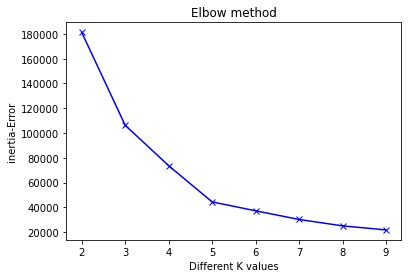

In [35]:
ssd = []
K = range(2,10)
for k in K :
    model = KMeans(n_clusters = k, max_iter = 300, n_init = 10, random_state = 0)
    model.fit(X2)
    ssd.append(model.inertia_)
plt.plot(K, ssd, "bx-")
plt.xlabel('Different K values')
plt.ylabel('inertia-Error')
plt.title('Elbow method')

In [36]:
kmeansmodel = KMeans(n_clusters = 5)
y_means = kmeansmodel.fit_predict(X2)
y_means

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1,
       3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

In [37]:
kmeansmodel.inertia_

44448.45544793369

In [38]:
X2['predicted_clust']  = kmeansmodel.labels_
X2

,Annual Income,Spending_Score,predicted_clust
0,15,39,3
1,15,81,4
2,16,6,3
3,16,77,4
4,17,40,3
...,...,...,...
195,120,79,0
196,126,28,2
197,126,74,0
198,137,18,2


<AxesSubplot:xlabel='Annual Income', ylabel='Spending_Score'>

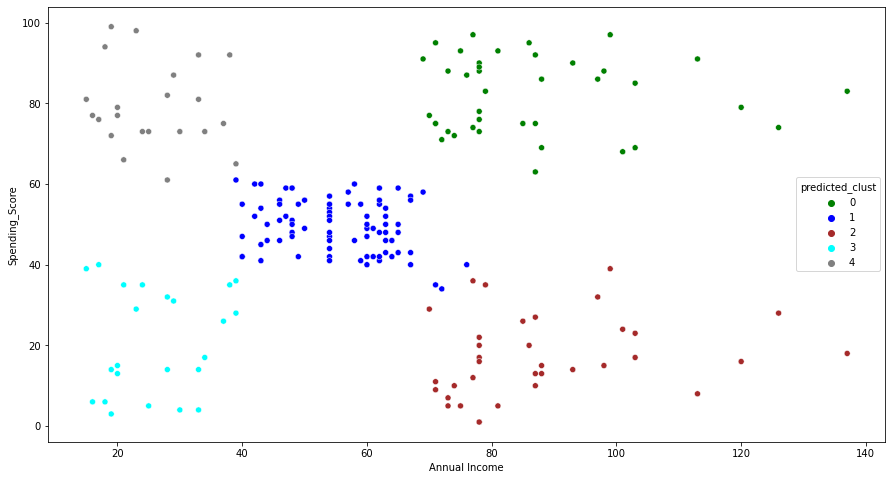

In [39]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = 'Annual Income', y = 'Spending_Score',hue = 'predicted_clust', data = X2, palette = ['green', 'blue', 'brown', 'cyan', 'grey'],legend = 'full')

## HIERARCHICAL CLUSTERING

In [41]:
# Dendogram Using
from scipy.cluster.hierarchy import linkage, dendrogram

In [42]:
hc_complete = linkage(X1, "complete")
hc_ward = linkage(X1, "ward")

In [43]:
from scipy.cluster.hierarchy import dendrogram

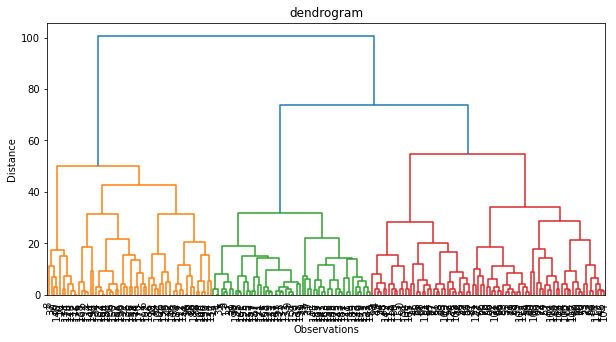

In [44]:
plt.figure(figsize=(10,5))
plt.title('dendrogram')
plt.xlabel('Observations')
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10);

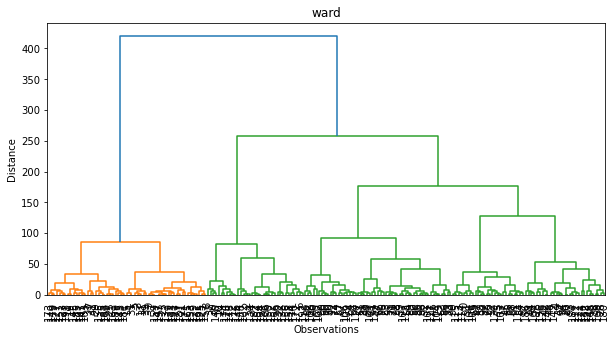

In [45]:
plt.figure(figsize=(10,5))
plt.title('ward')
plt.xlabel('Observations')
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);

In [46]:
hc_complete = linkage(X2, "complete")
hc_ward = linkage(X2, "ward")

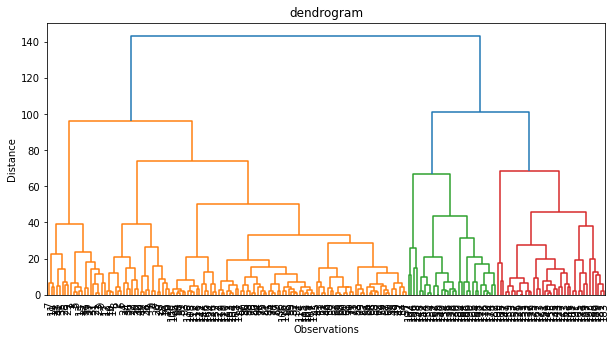

In [47]:
plt.figure(figsize=(10,5))
plt.title('dendrogram')
plt.xlabel('Observations')
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10);

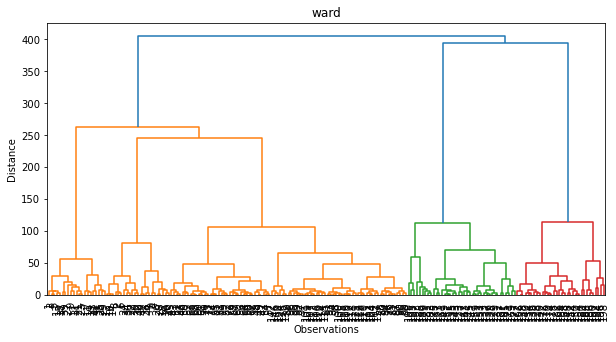

In [48]:
plt.figure(figsize=(10,5))
plt.title('ward')
plt.xlabel('Observations')
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);

In [49]:
## AGGLOMERATIVE CLUSTERING

In [50]:
from sklearn.cluster import AgglomerativeClustering

In [51]:
cluster = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage  = 'ward')
y_agg = cluster.fit_predict(X1)

In [52]:
X1['cluster2'] = y_agg
X1

,Age,Spending_Score,predicted_clusters,cluster2
0,19,39,3,0
1,21,81,1,3
2,20,6,0,2
3,23,77,1,3
4,31,40,3,0
...,...,...,...,...
195,35,79,1,3
196,45,28,0,0
197,32,74,1,3
198,32,18,0,0


<AxesSubplot:xlabel='Age', ylabel='Spending_Score'>

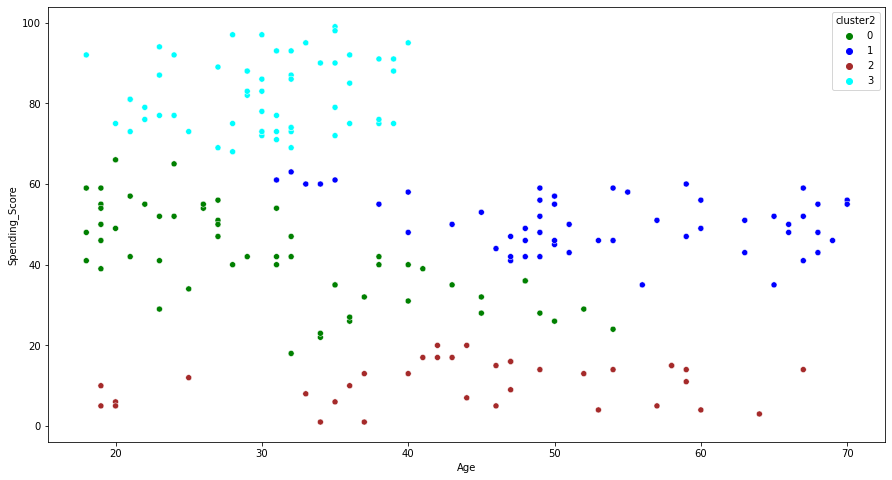

In [53]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = 'Age', y = 'Spending_Score',hue = 'cluster2', data = X1, palette = ['green', 'blue', 'brown', 'cyan'],legend = 'full')

<AxesSubplot:title={'center':'clusters with the number of customers'}, xlabel='clusters', ylabel='count'>

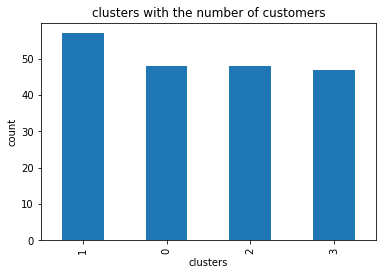

In [54]:
plt.title('clusters with the number of customers')
plt.xlabel("clusters")
plt.ylabel('count')
X1.predicted_clusters.value_counts().plot(kind = 'bar')

In [55]:
X1

,Age,Spending_Score,predicted_clusters,cluster2
0,19,39,3,0
1,21,81,1,3
2,20,6,0,2
3,23,77,1,3
4,31,40,3,0
...,...,...,...,...
195,35,79,1,3
196,45,28,0,0
197,32,74,1,3
198,32,18,0,0


In [56]:
cluster2 = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage  = 'ward')
y_agg2 = cluster2.fit_predict(X2)

In [57]:
X2['cluster2'] = y_agg2
X2

,Annual Income,Spending_Score,predicted_clust,cluster2
0,15,39,3,4
1,15,81,4,3
2,16,6,3,4
3,16,77,4,3
4,17,40,3,4
...,...,...,...,...
195,120,79,0,2
196,126,28,2,0
197,126,74,0,2
198,137,18,2,0


<AxesSubplot:xlabel='Annual Income', ylabel='Spending_Score'>

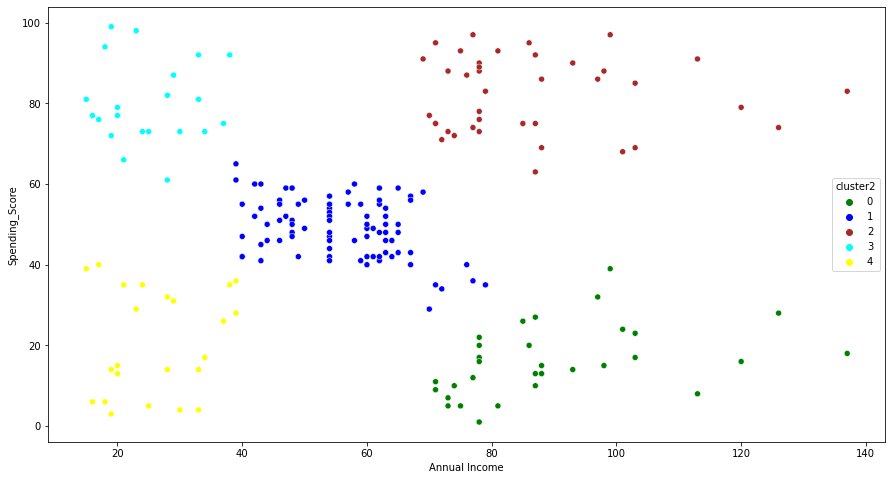

In [58]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = 'Annual Income', y = 'Spending_Score',hue = 'cluster2', data = X2, palette = ['green', 'blue', 'brown', 'cyan',  'yellow'],legend = 'full')

<AxesSubplot:title={'center':'clusters with the number of customers'}, xlabel='clusters', ylabel='count'>

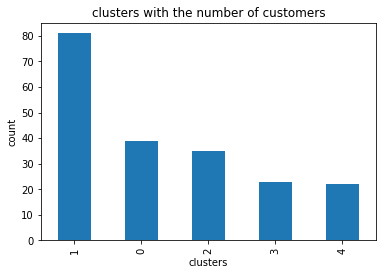

In [59]:
plt.title('clusters with the number of customers')
plt.xlabel("clusters")
plt.ylabel('count')
X2.predicted_clust.value_counts().plot(kind = 'bar')

In [60]:
X2

,Annual Income,Spending_Score,predicted_clust,cluster2
0,15,39,3,4
1,15,81,4,3
2,16,6,3,4
3,16,77,4,3
4,17,40,3,4
...,...,...,...,...
195,120,79,0,2
196,126,28,2,0
197,126,74,0,2
198,137,18,2,0


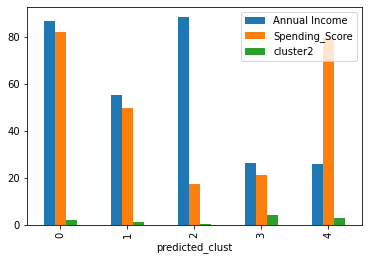

In [65]:
X2.groupby(X2.predicted_clust).mean().plot(kind = 'bar')
plt.show()

In [62]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


<AxesSubplot:title={'center':'MEN VS WOMEN'}, xlabel='predicted_clust', ylabel='count'>

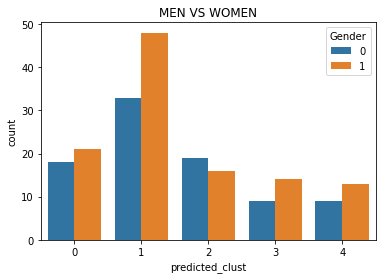

In [66]:
plt.title('MEN VS WOMEN')
plt.ylabel('count')
sns.countplot(X2['predicted_clust'], hue = df.Gender)

## CONCLUSION
